In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 

In [35]:
# Carregar dados
df = pd.read_csv("../data/raw/tasks.csv") 
df.head()

,id,descricao,tipo,prioridade,estimativa_horas,horas_reais,data_inicio,data_prevista,data_entregue,foi_atrasada
0,1,Tarefa 1,bug,média,14,12,2024-06-10,2024-06-10,2024-06-10,0
1,2,Tarefa 2,melhoria,média,11,17,2024-06-10,2024-06-10,2024-06-10,1
2,3,Tarefa 3,bug,média,15,15,2024-01-28,2024-01-28,2024-01-28,0
3,4,Tarefa 4,melhoria,alta,3,11,2024-03-11,2024-03-11,2024-03-11,1
4,5,Tarefa 5,bug,baixa,17,18,2024-06-21,2024-06-21,2024-06-21,1


In [36]:
# Codificando dados e variáveis
df_encoded = pd.get_dummies(df, columns=["tipo", "prioridade"], drop_first=False)

#print(df_encoded.columns)

X = df_encoded[[
    'estimativa_horas', 'horas_reais',
    'tipo_bug', 'tipo_melhoria',
    'prioridade_média', 'prioridade_alta'
]]
y = df_encoded["foi_atrasada"]

In [37]:
# Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
#print(y_test.value_counts())

In [38]:
# Treinamento
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[100  16]
 [  8 176]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       116
           1       0.92      0.96      0.94       184

    accuracy                           0.92       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.92      0.92       300



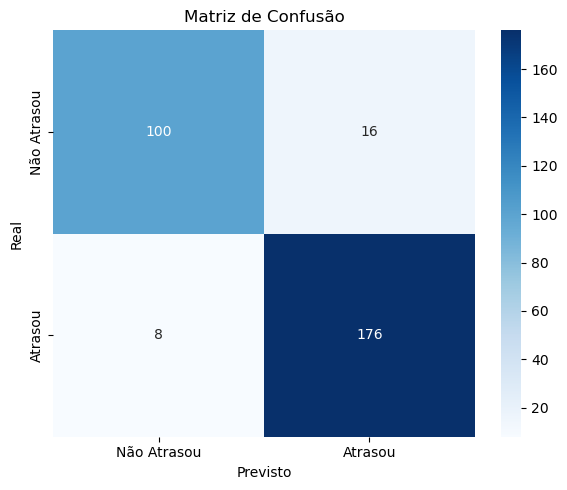

In [44]:
# Visualização do treinamento com seaborn
cm = confusion_matrix(y_test, y_pred)

labels = ["Não Atrasou", "Atrasou"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.tight_layout()
plt.show()